# shAI Training 2023 | Level 1


## Task#10 (MNIST Project)

### Classification

- Before you start make sure you have latest Jupyter notebook version 
- <font color= red> If you have older version fetching the data might be different  </font>  


## Get tha dataset

In [33]:
import sklearn.datasets

In [54]:
# CODE HERE 
# IF you got stuck use GOOGLE 
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True,as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [56]:
len(X[0])

784

784 pixels -> 28X28

### exploring and preparing the dataset

#### print your dataset to get insight

In [58]:
# CODE HERE
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### Split you data into data and labels (target)

In [59]:
# CODE HERE
# X are the data
# y are the targets

#### find the data shape using .shape function

In [60]:
# CODE HERE
import numpy as np
np.shape(X)

(70000, 784)

### Peek at one digit from the dataset

In [61]:
import matplotlib
import matplotlib.pyplot as plt

***NOTE: ALL THE COMMANDS FOR PLOTTING A FIGURE SHOULD ALL GO IN THE SAME CELL. SEPARATING THEM OUT INTO MULTIPLE CELLS MAY CAUSE NOTHING TO SHOW UP.***

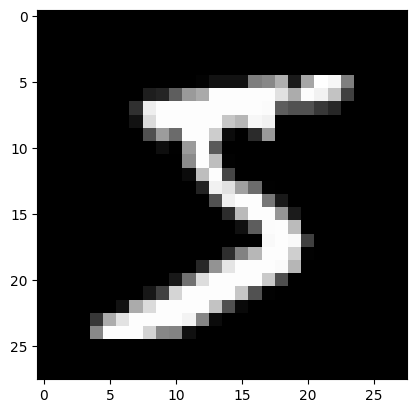

In [62]:
# CODE HERE 
first_image = X[0].reshape(28, 28)

# Use matplotlib to visualize the image
plt.imshow(first_image, cmap='gray')
plt.show()

In [63]:
y[0]

'5'

#### Split the data into train and test set

In [64]:
# CODE HERE 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Shuffling the training set

In [44]:
#hint shuffle-vs-permutation-numpy
# CODE HERE
# from the research the Train split, make shuffle
#from sklearn.utils import shuffle
#X_train, y_train = shuffle(X_train, y_train, random_state=42)


#### access the label of the above digit image 

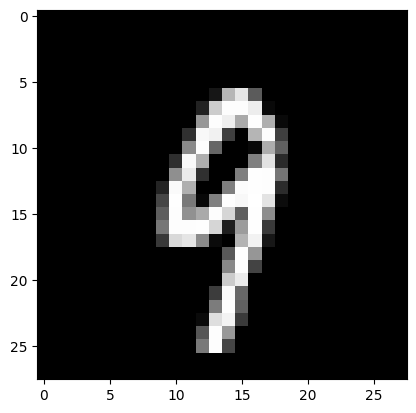

In [70]:
first_image = X_train[12].reshape(28, 28)

# Use matplotlib to visualize the image
plt.imshow(first_image, cmap='gray')
plt.show()

In [71]:
# CODE HERE
y_train[12]

'9'

### Training a <font color= red>Binary</font> classifier 


#### Create the target vectors for this classification task
***NOTE : you can try different number.***

In [73]:
# CODE HERE
# If you got stuck use GOOGLE
# y is the target
print(y_train)

['5' '4' '8' ... '1' '0' '0']


### SGD classifier

#### Create a SGD classifier 

In [74]:
from sklearn.linear_model import SGDClassifier

In [76]:
# classifier to classify its no 5 or not

In [77]:
# CODE HERE
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

# Create an instance of SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

# Train the model using the new target vector
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

#### use SGD classifier  to detect images of the number 5 

In [79]:
# CODE HERE
y_pred = sgd_clf.predict(X_test)


In [81]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test_5, y_pred)

print(conf_matrix)

[[12620   107]
 [  334   939]]


## Performance measure 

####  Measuring Accuracy Using <font color= blue>Cross-validation</font>

In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
# CODE HERE
# Perform cross-validation
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.97192907, 0.96855413, 0.96024858])

In [90]:
y_test_pred = sgd_clf.predict(X_test)

#### Try a dumb classifier

In [84]:
# CODE HERE
# dumb clssifier is NB
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

# Create an instance of the dumb classifier and evaluate its accuracy
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")




array([0.91107302, 0.90914448, 0.90978249])

#### find cross_val_score for the dumb classifier

In [85]:
#CODE HERE
# shown above

## Confusion matrix

In [86]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

#### try to find confusion matrix 

In [87]:
# CODE HERE
y_pred = never_5_clf.predict(X_test)
conf_matrix = confusion_matrix(y_test_5, y_pred)

print(conf_matrix)

[[12727     0]
 [ 1273     0]]


####  try perfect classifier which will have only true positives and true negative


In [88]:
# CODE HERE
y_test_perfect_predictions = y_test_5

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_5, y_test_perfect_predictions)

print(conf_matrix)

[[12727     0]
 [    0  1273]]


## Precision and Recall

In [89]:
from sklearn.metrics import precision_score, recall_score,f1_score

In [91]:
y_test_pred = sgd_clf.predict(X_test)

***Note that precision and recall score might be different from one to anothor***

#### find precision score

In [92]:
# CODE HERE
precision = precision_score(y_test_5, y_test_pred)
precision 

0.8977055449330784

#### find recall score

In [94]:
# CODE HERE
recall = recall_score(y_test_5, y_test_pred)
recall

0.7376276512175962

#### find f1 score 
***Notice that f1 score is harmonic mean between recall and precision***

In [95]:
# CODE HERE
f1 = f1_score(y_test_5, y_test_pred)
f1

0.8098318240620959

# Precision/Recall Tradeof

#### try to use decision_function() and make prediction

In [96]:
# CODE HERE
# Get the scores from the decision function
y_scores = sgd_clf.decision_function(X_test)

#### Set the threshold to zero

In [97]:
# CODE HERE
# Set a threshold and make predictions based on the scores
threshold = 0
y_test_pred = (y_scores > threshold)


In [102]:
np.bincount(y_test_pred)

array([12954,  1046])

In [103]:
class_counts = np.bincount(y_test_pred.astype(int))
print("Count for Class False (not-5): ", class_counts[0])
print("Count for Class True (5): ", class_counts[1])


Count for Class False (not-5):  12954
Count for Class True (5):  1046


#### Set the threshold to 200000

In [104]:
# CODE HERE
threshold =  200000
y_test_pred = (y_scores > threshold)

In [106]:
np.bincount(y_test_pred.astype(int))


array([14000])

In [107]:
# it counts all as 5

#### To decide which threshold you want to use find decision scores for all instances

In [108]:
# CODE HERE
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

# Get the scores of all instances in the training set
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

# Compute precision and recall for all possible thresholds
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)


#### computing precision and recall for all possible thresholds using the precision_recall_curve() 

#### plot precision and recall as functions of the threshold value using Matplotlib

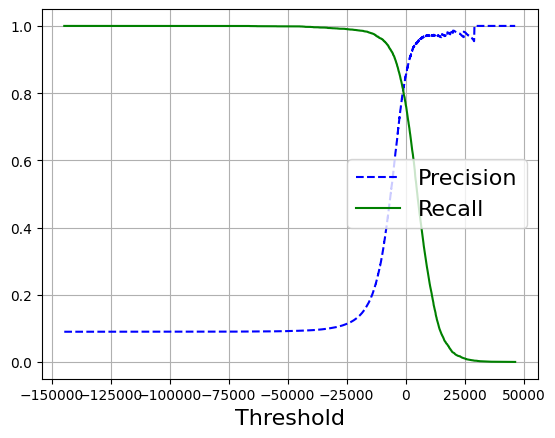

In [110]:
import matplotlib.pyplot as plt

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.legend(loc="center right", fontsize=16)
plt.xlabel("Threshold", fontsize=16)
plt.grid(True)
plt.show()

#### lets aim for 90%recall 
#### try different threshold and see what will happen

In [111]:
# Find the lowest threshold that gives at least 90% recall
threshold_90_recall = thresholds[np.argmax(recalls >= 0.90)]

# Make predictions using this threshold
y_train_pred_90 = (y_scores >= threshold_90_recall)


#### precision score

In [112]:
# CODE HERE
print("Precision: ", precision_score(y_train_5, y_train_pred_90))

Precision:  0.09


#### recall score

In [113]:
#CODE HERE
print("Recall: ", recall_score(y_train_5, y_train_pred_90))

Recall:  1.0


# The ROC Curve

In [114]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

#### plot the FPR against the TPR using Matplotlib

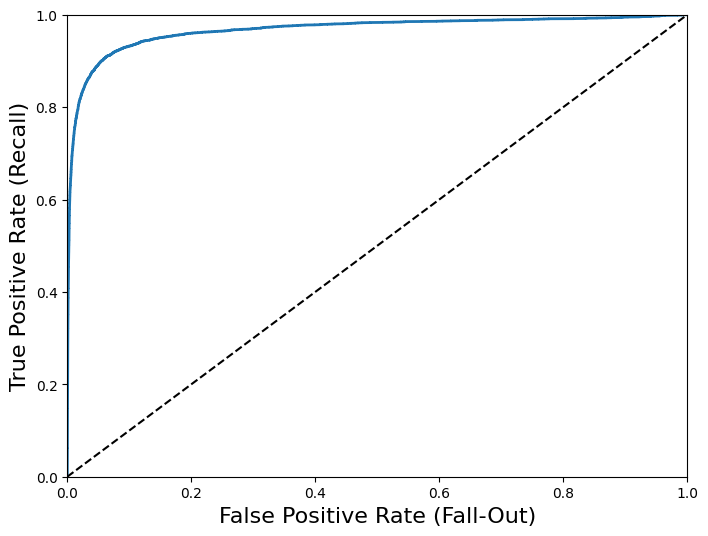

In [116]:
# CODE HERE
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.axis([0, 1, 0, 1])           # Not shown in the book
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)                                               
plt.show()

#### computing the ROC AUC score

In [117]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9672937302210262

# RandomForest Classifier
#### train a RandomForestClassifier and compare its ROC curve and ROC AUC score to the SGDClassifier

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
# CODE HERE
forest_clf = RandomForestClassifier(random_state=42)

# Fit the model to the training data
forest_clf.fit(X_train, y_train_5)

RandomForestClassifier(random_state=42)

#### try to plot ROC 
***Notice that you will need scores not probabilities***

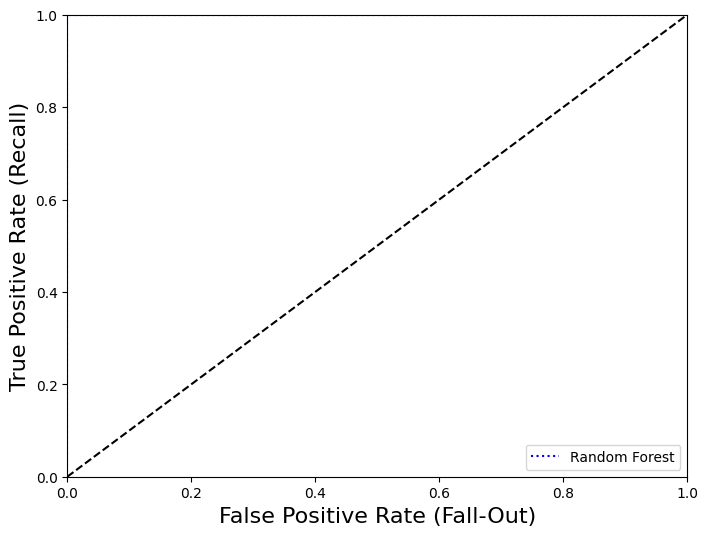

In [121]:
# CODE HERE
# if you got suck use GOOGLE
y_probas_forest = forest_clf.predict_proba(X_train)[:, 1]

# Compute FPR, TPR, and thresholds
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_probas_forest)

# Plot FPR against TPR
plt.figure(figsize=(8, 6))
plt.plot(fpr_forest, tpr_forest, "b:", label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.axis([0, 1, 0, 1])           
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)                                              
plt.legend(loc="lower right")
plt.show()

#### find ROC AUC score for randomforestclassifier

In [122]:
# CODE HERE 
roc_auc_score(y_train_5, y_probas_forest)

1.0


# Congrats you did it 🥳 !
# #shAI_Club